In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

In [13]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
y_train.shape

(60000,)

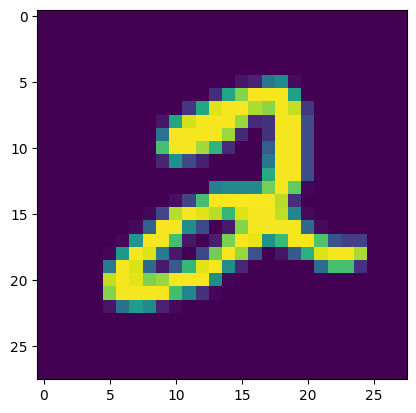

In [17]:
plt.imshow(X_train[5])

In [18]:
# flatten images into one dimensional vectors
num_pixels = X_train.shape[1]*X_train.shape[2]
num_pixels

784

In [19]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [20]:
# normalize inputs from 255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape


(60000, 10)

In [22]:
num_classes = y_train.shape[1]
num_classes

10

### Build a NN

In [23]:
def classification_model():
    model = Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
model = classification_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose = 2)
scores = model.evaluate(X_test, y_test, verbose=0)


Epoch 1/10
1875/1875 - 21s - 11ms/step - accuracy: 0.9431 - loss: 0.1866 - val_accuracy: 0.9663 - val_loss: 0.1036
Epoch 2/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9750 - loss: 0.0784 - val_accuracy: 0.9788 - val_loss: 0.0679
Epoch 3/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9686 - val_loss: 0.1075
Epoch 4/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9870 - loss: 0.0407 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 5/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9894 - loss: 0.0325 - val_accuracy: 0.9754 - val_loss: 0.0874
Epoch 6/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9810 - val_loss: 0.0748
Epoch 7/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9927 - loss: 0.0218 - val_accuracy: 0.9810 - val_loss: 0.0756
Epoch 8/10
1875/1875 - 20s - 11ms/step - accuracy: 0.9937 - loss: 0.0201 - val_accuracy: 0.9760 - val_loss: 0.0980
Epoch 9/10
1875/1875 - 18s - 10ms/step - accuracy: 0.9944 - loss: 0.0175 - val_a

In [25]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9796000123023987% 
 Error: 0.02039998769760132


In [27]:
model.save('classification_model.keras')

In [28]:
#  use this when you want to reuse the model
pretrained_model = keras.saving.load_model('classification_model.keras')